# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### See 'P3 Writeup.md' for a writeup of this project and 'Traffic_Sign_Classifier.html' for a published document

---
## Step 0: Load The Data

In [33]:
## Check that GPU environment is working
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5297805962893672864
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6680312545
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12053897815899446682
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [34]:
# Load pickled data
import pickle
from scipy import stats

training_file = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P3-Traffic-Sign-Classifier-Project\traffic-signs-data\train.p'
validation_file= r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P3-Traffic-Sign-Classifier-Project\traffic-signs-data\valid.p'
testing_file = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P3-Traffic-Sign-Classifier-Project\traffic-signs-data\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### The following print statements are used to confirm that I understand
### The datasets I am dealing with. The next uncommented line uses 
### stats.describe from scipy in order to get more stats about our data.

# print(train['features'][0][0][0][0].shape)
# print(train['features'][34332].shape)
# print(train['features'][0].shape)
# print(train['features'].shape)
# print(valid['features'].shape)
# print(test['features'].shape)
# print(valid.keys())
# print(test.keys())
# print(train['labels'].shape)
# print(train['sizes'].shape)
# print(train['coords'].shape
# print(train['coords'].shape)
# stats.describe(X_train[0])
# print(X_train[0].shape)




---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [35]:
#Get stats about training image pixels
stats.describe(X_train)

DescribeResult(nobs=34799, minmax=(array([[[5, 4, 1],
        [5, 4, 4],
        [5, 4, 3],
        ...,
        [4, 4, 3],
        [4, 4, 1],
        [1, 4, 3]],

       [[5, 4, 3],
        [5, 4, 6],
        [5, 4, 0],
        ...,
        [1, 4, 5],
        [5, 4, 5],
        [5, 4, 5]],

       [[5, 4, 2],
        [5, 4, 2],
        [5, 4, 3],
        ...,
        [4, 4, 2],
        [4, 4, 2],
        [4, 4, 2]],

       ...,

       [[3, 3, 0],
        [0, 4, 3],
        [5, 4, 3],
        ...,
        [4, 4, 5],
        [5, 4, 5],
        [4, 4, 5]],

       [[4, 3, 2],
        [2, 4, 1],
        [5, 4, 5],
        ...,
        [5, 4, 5],
        [5, 4, 1],
        [5, 4, 5]],

       [[4, 3, 2],
        [2, 4, 4],
        [4, 4, 5],
        ...,
        [5, 4, 3],
        [5, 4, 5],
        [5, 4, 0]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],


In [4]:
#Get stats about training images' labels
stats.describe(y_train)

DescribeResult(nobs=34799, minmax=(0, 42), mean=15.738297077502228, variance=144.06166077029752, skewness=0.642665581948834, kurtosis=-0.8476135012388601)

In [5]:
#Get stats about training images' original sizes
stats.describe(train['sizes'])

DescribeResult(nobs=34799, minmax=(array([25, 25], dtype=uint8), array([243, 225], dtype=uint8)), mean=array([50.97979827, 50.45113365]), variance=array([602.75673309, 544.53539436]), skewness=array([2.11749873, 2.01964011]), kurtosis=array([5.88408033, 5.21976188]))

In [6]:
#Get stats about training images' sign bounding boxes
stats.describe(train['coords'])

DescribeResult(nobs=34799, minmax=(array([ 0,  5, 20, 20], dtype=uint8), array([ 20,  20, 223, 205], dtype=uint8)), mean=array([ 6.00775884,  5.9708325 , 45.33078537, 44.84281158]), variance=array([  2.23351644,   1.96871645, 542.10584889, 491.6050974 ]), skewness=array([3.15475067, 3.02996643, 2.00020352, 1.90220307]), kurtosis=array([13.4949004 , 12.40699582,  5.26845264,  4.62445654]))

In [7]:
#Get stats about validation image pixels
stats.describe(X_valid)

DescribeResult(nobs=4410, minmax=(array([[[6, 6, 7],
        [6, 6, 7],
        [6, 5, 8],
        ...,
        [5, 6, 0],
        [6, 5, 2],
        [6, 5, 6]],

       [[6, 6, 7],
        [6, 6, 8],
        [6, 5, 7],
        ...,
        [5, 6, 7],
        [6, 6, 1],
        [7, 6, 7]],

       [[5, 5, 7],
        [6, 5, 7],
        [7, 6, 8],
        ...,
        [5, 6, 2],
        [6, 6, 2],
        [7, 6, 2]],

       ...,

       [[6, 5, 7],
        [7, 6, 7],
        [6, 6, 7],
        ...,
        [6, 6, 7],
        [6, 6, 7],
        [6, 6, 7]],

       [[6, 5, 7],
        [6, 5, 8],
        [7, 6, 7],
        ...,
        [6, 5, 7],
        [6, 6, 7],
        [6, 6, 7]],

       [[6, 5, 6],
        [6, 6, 5],
        [6, 6, 7],
        ...,
        [6, 6, 7],
        [6, 6, 7],
        [6, 6, 8]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],



In [8]:
#Get stats about validation image labels
stats.describe(y_valid)

DescribeResult(nobs=4410, minmax=(0, 42), mean=16.183673469387756, variance=146.1966941460186, skewness=0.5814042666076606, kurtosis=-0.922236139744419)

In [9]:
#Get stats about validation set images' original sizes
stats.describe(valid['sizes'])

DescribeResult(nobs=4410, minmax=(array([25, 25], dtype=uint8), array([218, 201], dtype=uint8)), mean=array([49.70022676, 49.36462585]), variance=array([495.35216597, 452.79285136]), skewness=array([2.01914985, 1.94031088]), kurtosis=array([5.52064261, 4.8966219 ]))

In [10]:
#Get stats about validation set images' sign bounding boxes
stats.describe(valid['coords'])

DescribeResult(nobs=4410, minmax=(array([ 5,  5, 20, 20], dtype=uint8), array([ 19,  17, 200, 184], dtype=uint8)), mean=array([ 5.93446712,  5.89569161, 44.14399093, 43.82539683]), variance=array([  1.72738966,   1.52597372, 449.07225352, 411.88468033]), skewness=array([3.09307346, 2.90322415, 1.8901607 , 1.81771943]), kurtosis=array([13.79821606, 12.0354459 ,  4.83471863,  4.2797398 ]))

In [11]:
#Get stats about testing set image pixels
stats.describe(X_test)

DescribeResult(nobs=12630, minmax=(array([[[5, 4, 2],
        [5, 5, 3],
        [5, 4, 3],
        ...,
        [5, 5, 4],
        [4, 5, 4],
        [3, 4, 2]],

       [[5, 4, 2],
        [2, 5, 5],
        [5, 5, 7],
        ...,
        [5, 4, 5],
        [4, 4, 2],
        [2, 4, 3]],

       [[5, 5, 2],
        [5, 5, 2],
        [5, 5, 6],
        ...,
        [4, 4, 5],
        [3, 4, 1],
        [2, 4, 3]],

       ...,

       [[3, 4, 0],
        [4, 4, 5],
        [4, 4, 5],
        ...,
        [4, 4, 6],
        [3, 4, 1],
        [3, 4, 0]],

       [[6, 5, 0],
        [5, 5, 0],
        [5, 4, 3],
        ...,
        [4, 4, 5],
        [3, 4, 2],
        [3, 4, 0]],

       [[5, 5, 0],
        [6, 5, 6],
        [6, 5, 6],
        ...,
        [5, 4, 5],
        [1, 4, 3],
        [3, 4, 0]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],


In [12]:
#Get stats about testing set image labels
stats.describe(y_test)

DescribeResult(nobs=12630, minmax=(0, 42), mean=15.551068883610451, variance=142.7337525196034, skewness=0.6734239380136033, kurtosis=-0.797839541256852)

In [13]:
#Get stats about testing set images' original sizes
stats.describe(test['sizes'])

DescribeResult(nobs=12630, minmax=(array([ 2, 25], dtype=uint8), array([253, 232], dtype=uint8)), mean=array([50.4469517 , 50.36444972]), variance=array([619.35465656, 561.63824831]), skewness=array([2.25328517, 2.13345319]), kurtosis=array([6.86571843, 6.06237751]))

In [14]:
#Get stats about testing set images' sign bounding box
stats.describe(test['coords'])

DescribeResult(nobs=12630, minmax=(array([ 1,  5, 20, 20], dtype=uint8), array([ 23,  19, 244, 212], dtype=uint8)), mean=array([ 5.99802059,  5.9824228 , 44.86444972, 44.7581156 ]), variance=array([  2.38379527,   2.03754041, 565.30302779, 506.01140574]), skewness=array([3.48631335, 3.17243658, 2.2079413 , 2.01053751]), kurtosis=array([17.2721374 , 13.81600935,  6.9660293 ,  5.39365085]))

### Provided below is a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [15]:
# Number of training examples
n_train = train['labels'].shape[0]

# Number of validation examples
n_validation = valid['labels'].shape[0]

# Number of testing examples.
n_test = test['labels'].shape[0]

# What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# Finding class count
L = []

for e in train['labels']:
    if e not in L:
        L.append(e)

n_classes = len(L)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os,sys


    
# To explore the data, I decided to show histograms for each set (training, test and validation) that represent the frequency of each label (0 to 42)
# This can be beneficial later on in order to see whether prediction accuracy is label dependent
# in case we decide to look more closely into our model prediction accuracy 

# Number of bins is equal to number of labels
n_bins = 43

# Create lists with frequency of each label for all three sets (training, test, validation)
test_qty = []
for e in test['labels']:
    test_qty.append(e)

train_qty = []
for e in train['labels']:
    train_qty.append(e)
    
valid_qty = []
for e in valid['labels']:
    valid_qty.append(e)

# Visualizing test set
fig, axs = plt.subplots(1, figsize=(20,5))
# We can set the number of bins with the `bins` kwarg
axs.hist(test_qty, bins=n_bins)

#showing all ticks to make it easier to read
plt.xticks(np.arange(0, 43, 1.0))
plt.show()
# # Visualizations will be shown in the notebook.
%matplotlib inline
fig.savefig('test_labels.png')

# Following 7 lines of code modify the extension to .jpg since I was 
# having trouble viewing .png images in my .md write up file
folder = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P3-Traffic-Sign-Classifier-Project'
infilename = os.path.join(folder,'test_labels.png')
oldbase = os.path.splitext('test_labels.png')
newname = infilename.replace('.png', '.jpg')
try:
    output = os.rename(infilename, newname)
except:
    pass


<Figure size 2000x500 with 1 Axes>

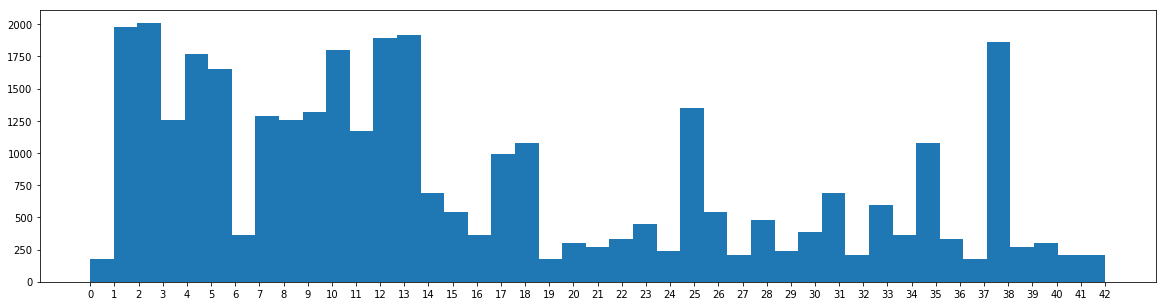

In [17]:
# Showing training set data

fig, axs = plt.subplots(1, figsize=(20,5))
axs.hist(train_qty, bins=n_bins)

#showing all ticks to make it easier to read
plt.xticks(np.arange(0, 43, 1.0))

plt.show()
# # Visualizations will be shown in the notebook.
%matplotlib inline

fig.savefig('training_labels.png')

# Following 7 lines of code modify the extension to .jpg since I was 
# having trouble viewing .png images in my .md write up file
infilename = os.path.join(folder,'training_labels.png')
oldbase = os.path.splitext('training_labels.png')
newname = infilename.replace('.png', '.jpg')
try:
    output = os.rename(infilename, newname)
except:
    pass

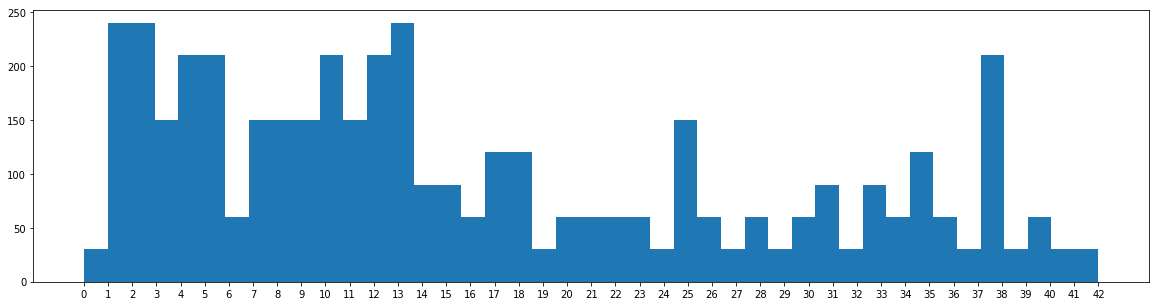

In [18]:
# Showing validation set data

fig, axs = plt.subplots(1, figsize=(20,5))
axs.hist(valid_qty, bins=n_bins)

#showing all ticks to make it easier to read
plt.xticks(np.arange(0, 43, 1.0))

plt.show()
# # Visualizations will be shown in the notebook.
%matplotlib inline

fig.savefig('validation_labels.png')

# Following 7 lines of code modify the extension to .jpg since I was 
# having trouble viewing .png images in my .md write up file
infilename = os.path.join(folder,'validation_labels.png')
oldbase = os.path.splitext('validation_labels.png')
newname = infilename.replace('.png', '.jpg')
try:
    output = os.rename(infilename, newname)
except:
    pass

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

True
True
True


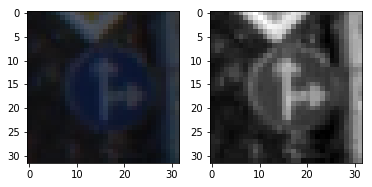

In [19]:
### Preprocessing the data  
import cv2

# Next lines of code until line 11 visualize a RGB image (OR BGR, as read by OpenCV), its conversion to grayscale 
# and some more pre-processing: I decided to resize the image back to its original size (not 32x32) in order to 
# properly trim it using the values stored in the 'coords' key. After that, I resized the image back to 32x32
# so that it works with the LeNet5 architecture

gray_img = cv2.cvtColor(train['features'][1000], cv2.COLOR_BGR2GRAY)


# gray_img1 = cv2.resize(gray_img,(train['sizes'][1000][0],train['sizes'][1000][1]))
# gray_img1 = gray_img1[train['coords'][1000][0]:train['coords'][1000][2],train['coords'][1000][1]:train['coords'][1000][3]]
# gray_img1 = cv2.resize(gray_img1,(32,32))



f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(train['features'][1000])
f.add_subplot(1,2, 2)
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
# f.add_subplot(1,3, 3)
# plt.imshow(gray_img1, cmap = plt.get_cmap('gray'))

f.savefig('grayscale_example.png')

# Creates a list to append normalized image data to. I realized that I cannot alter the images as is
# Since it wouldn't make sense for an image to store negative values (so it doesn't, it returns either 0 or 255 instead
# which prevents normalization)
L_train = []
L_train_new_data = []
L_new_labels = []

for i in range(0, n_train):
#     print(L[0])
    D3 = cv2.cvtColor(train['features'][i], cv2.COLOR_BGR2GRAY) #CONVERT TO GRAYSCALE
#     D4 = cv2.resize(D3,(train['sizes'][i][0],train['sizes'][i][1])) #resize to unprocessed size
#     D4 = D4[train['coords'][i][0]:train['coords'][i][2],train['coords'][i][1]:train['coords'][i][3]] #trim outside bounding box
#     D4 = cv2.resize(D4,(32,32))
    
    D3 = D3[:,:,None] # Slicing to maintain the three dimensional image shape
#     D4 = D4[:,:,None] # Slicing to maintain the three dimensional image shape

#     D3 = train['features'][i]
    L_train.append(D3)
    L_train[-1] = (L_train[-1]-128.0)/128.0 #normalize
    

print(n_train == len(L_train)) # validate that length of list equals n_validation


L_validation = []
for i in range(0, n_validation):
#     print(L[0])
    D3 = cv2.cvtColor(valid['features'][i], cv2.COLOR_BGR2GRAY) #CONVERT TO GRAYSCALE
#     D4 = cv2.resize(D3,(valid['sizes'][i][0],valid['sizes'][i][1])) #resize to unprocessed size
#     D4 = D3[valid['coords'][i][0]:valid['coords'][i][2],valid['coords'][i][1]:valid['coords'][i][3]] #trim outside bounding box
#     D4 = cv2.resize(D3,(32,32))
    D3 = D3[:,:,None] # Slicing to maintain the three dimensional image shape
    
    L_validation.append(D3)    
    L_validation[-1] = (L_validation[-1]-128.0)/128.0
#     print(L[0])
print(n_validation == len(L_validation)) # validate that length of list equals n_validation

L_test = []
for i in range(0, n_test):
#     print(L[0])
    D3 = cv2.cvtColor(test['features'][i], cv2.COLOR_BGR2GRAY) #CONVERT TO GRAYSCALE
    D3 = D3[:,:,None] # Slicing to maintain the three dimensional image shape
    
#     D3 = test['features'][i]
    L_test.append(D3)
    L_test[-1] = (L_test[-1]-128.0)/128.0
#     print(L[0])
print(n_test == len(L_test)) # validate that length of list equals n_test

### Model Architecture

In [20]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Shuffle the training data (normalized features (image data) and their corresponding labels) in order to 
# keep training general and prevent overfitting.

L_train, train['labels'] = shuffle(L_train, train['labels'])
EPOCHS = 50
BATCH_SIZE = 128



## Implementing LeNet-5 architecture

### Important formulas:

W = width, F = convolution filter size, P = padding (0 for 'valid' and 1 for 'same'), S = stride

width of the next layer: W_out =[ (W−F+2P)/S] + 1.

The output height: H_out = [(H-F+2P)/S] + 1.

output depth is equal to the number of filters: D_out = K.


### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** RELU activation function

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** RELU activation function

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** RELU activation function

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** RELU activation function

**Drop out** Drop out some of the data depending on the value of 'prob' below 

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.


In [24]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
        
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
#     print('conv1 = ' + str(conv1))
#     print('x = ' + str(x))

    # Activation.
    conv1 = tf.nn.relu(conv1)
#     print('conv1 act = ' + str(conv1))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    LeNet.conv1 = conv1 #make conv1 accessible from another function
#     print('pool1 = ' + str(conv1))

    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Drop out
#     prob = tf.placeholder_with_default(1.0, shape=())
    fc2  = tf.nn.dropout(fc2, prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    
    return logits

### Train, Validate and Test the Model

A validation set was used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Training the model here.
### Calculate and report the accuracy on the training and validation set.

prob = tf.placeholder_with_default(1.0, shape=())
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder for images
y = tf.placeholder(tf.int32, (None)) # placeholder for a batch of labels
one_hot_y = tf.one_hot(y, 43)

# Training setup. Setting up the learning rate, defining error function or cross entropy and minimizing (optimizing) 
#it using tensorflow's built in Adam optimizer

rate = 0.003

logits = LeNet(x)
print('logits' + str(logits.shape))
print(logits[0])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# evaluate() finds the accuracy of the model for an input dataset

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    
# Running the training data through the training pipeline to train the model.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
#     print()
    for i in range(EPOCHS):
        #before each EPOCH, shuffle the training set
        L_train, train['labels'] = shuffle(L_train, train['labels']) 
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = L_train[offset:end], train['labels'][offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, prob: 0.5})

#         After each epoch, measure the loss and accuracy of the validation set.
#         training_accuracy = evaluate(L_train, train['labels'])
        validation_accuracy = evaluate(L_validation, valid['labels'])
        train_accuracy = evaluate(L_train, train['labels'])

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(train_accuracy))

            

    
    # saving the model 

    saver.save(sess, './lenet')
    print("Model saved")
    



logits(?, 43)
Tensor("strided_slice_2:0", shape=(43,), dtype=float32)
Training...
EPOCH 1 ...
Validation Accuracy = 0.820
Training Accuracy = 0.892
EPOCH 2 ...
Validation Accuracy = 0.906
Training Accuracy = 0.957
EPOCH 3 ...
Validation Accuracy = 0.917
Training Accuracy = 0.976
EPOCH 4 ...
Validation Accuracy = 0.925
Training Accuracy = 0.982
EPOCH 5 ...
Validation Accuracy = 0.929
Training Accuracy = 0.987
EPOCH 6 ...
Validation Accuracy = 0.947
Training Accuracy = 0.990
EPOCH 7 ...
Validation Accuracy = 0.933
Training Accuracy = 0.991
EPOCH 8 ...
Validation Accuracy = 0.930
Training Accuracy = 0.986
EPOCH 9 ...
Validation Accuracy = 0.937
Training Accuracy = 0.993
EPOCH 10 ...
Validation Accuracy = 0.950
Training Accuracy = 0.994
EPOCH 11 ...
Validation Accuracy = 0.941
Training Accuracy = 0.996
EPOCH 12 ...
Validation Accuracy = 0.942
Training Accuracy = 0.995
EPOCH 13 ...
Validation Accuracy = 0.946
Training Accuracy = 0.995
EPOCH 14 ...
Validation Accuracy = 0.941
Training Accura

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(L_test, test['labels'])
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.924


---

## Step 3: Test a Model on New Images

To give more insight into how the model is working, I downloaded five pictures of German traffic signs from the web and used the model to predict the traffic sign type.

The file `signnames.csv` is useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

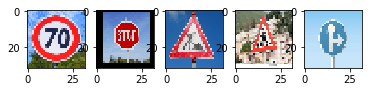

In [27]:
### Load the images and plot them.

img1 = cv2.imread('German-traffic-signs\id4.png')
img2 = cv2.imread('German-traffic-signs\id14.png')
img3 = cv2.imread('German-traffic-signs\id25.png')
img4 = cv2.imread('German-traffic-signs\id27.png')
img5 = cv2.imread('German-traffic-signs\id36.png')

image_list = []

#resize images to 32x32
for e in [img1,img2,img3,img4,img5]:
    e = cv2.cvtColor(e, cv2.COLOR_BGR2RGB)
    e = cv2.resize(e,(32,32))
    image_list.append(e)
    
labels1 = [4,14,25,27,36]



f = plt.figure()

# Show processed 32x32 images in RGB mode
for i in range(len(image_list)):
    f.add_subplot(1,5, i+1)
    plt.imshow(image_list[i], cmap = plt.get_cmap('gray'))

## the 4th image from the left seems particularly hard to classify since the sign is not parallel to the camera lens
## (Transposing the image could be useful)


### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

processed_images = []
for i in range(0, len(image_list)):
    D3 = cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY) #CONVERT TO GRAYSCALE
#     D4 = cv2.resize(D3,(valid['sizes'][i][0],valid['sizes'][i][1])) #resize to unprocessed size
#     D4 = D3[valid['coords'][i][0]:valid['coords'][i][2],valid['coords'][i][1]:valid['coords'][i][3]] #trim outside bounding box
#     D4 = cv2.resize(D3,(32,32))
    D3 = D3[:,:,None] # Slicing to maintain the three dimensional image shape
    
    processed_images.append(D3)    
    processed_images[-1] = (processed_images[-1]-128.0)/128.0
#     print(L[0])
print(n_validation == len(L_validation)) # validate that length of list equals n_validation

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy1 = evaluate(processed_images[0][None,:,:], ([labels1[0]]))
    test_accuracy2 = evaluate(processed_images[1][None,:,:], ([labels1[1]]))
    test_accuracy3 = evaluate(processed_images[2][None,:,:], ([labels1[2]]))
    test_accuracy4 = evaluate(processed_images[3][None,:,:], ([labels1[3]]))
    test_accuracy5 = evaluate(processed_images[4][None,:,:], ([labels1[4]]))


    print("Test Accuracy 1 = {:.3f}".format(test_accuracy1))
    print("Test Accuracy 2 = {:.3f}".format(test_accuracy2))
    print("Test Accuracy 3 = {:.3f}".format(test_accuracy3))
    print("Test Accuracy 4 = {:.3f}".format(test_accuracy4))
    print("Test Accuracy 5 = {:.3f}".format(test_accuracy5))
    
    
    



True
INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy 1 = 1.000
Test Accuracy 2 = 0.000
Test Accuracy 3 = 1.000
Test Accuracy 4 = 0.000
Test Accuracy 5 = 1.000


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 

accuracy = (test_accuracy1 + test_accuracy2 +test_accuracy3 + test_accuracy4 + test_accuracy5)*100/5
print(str(accuracy) + '%')

60.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
 
print(labels1) 
with tf.Session() as sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probs = sess.run(tf.nn.softmax(logits), feed_dict={x: processed_images})
    top5 = sess.run(tf.nn.top_k(tf.constant(probs), k = 5))
    print("Softmax Probabilities: ")
    print(top5)

    
# The model is very certain when it guessed right (almost 100%). It is also very certain when
# it guessed wrong (top softmax probability is at least ten orders of magnitude higher than
# the second probability)

[4, 14, 25, 27, 36]
INFO:tensorflow:Restoring parameters from .\lenet
Softmax Probabilities: 
TopKV2(values=array([[1.0000000e+00, 1.7068588e-26, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.2158862e-14, 5.9377502e-22, 3.1331551e-22,
        1.8155302e-24],
       [1.0000000e+00, 1.5043357e-31, 1.1699521e-31, 3.3121129e-37,
        3.3995271e-38],
       [9.9999988e-01, 1.5213770e-07, 4.2433603e-09, 1.7506623e-14,
        4.5339958e-16],
       [1.0000000e+00, 1.8505612e-17, 1.3485954e-17, 8.3097870e-18,
        2.2366852e-18]], dtype=float32), indices=array([[ 4,  5,  0,  1,  2],
       [12,  1, 11,  8, 40],
       [25, 29, 31, 22,  5],
       [38,  1, 11,  3, 18],
       [36,  3, 25, 13,  6]]))


# **Traffic Sign Recognition** 

## Writeup


---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./test_labels.jpg "Test set label quantities"
[image2]: ./training_labels.jpg "Training set label quantities"
[image3]: ./validation_labels.jpg "Validation set label quantities"
[image4]: ./grayscale_example.png
[image5]: ./German-traffic-signs/id4.png "Speed limit (70km/h) Sign"
[image6]: ./German-traffic-signs/id14.png "Stop Sign"
[image7]: ./German-traffic-signs/id25.png "Road Work Sign"
[image8]: ./German-traffic-signs/id27.png "Pedestrians Sign"
[image9]: ./German-traffic-signs/id36.png "Go Straight or Right Sign"


## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Link to my [project code](https://github.com/woodyhaddad/P3-Traffic-Sign-Classifier.git)

### Data Set Summary & Exploration

#### 1. Basic summary of the data set. In the code, the analysis.

I used stats.describe from the scipy library to calculate summary statistics of the traffic signs data set. I also used np.array.shape() and loops/ conditionals to find properties that were not provided by scipy's stats. It is always good to look at what scipy provides since it is an easy way to know means, variances and min/maxes, which end up giving more insight about the data we are dealing with:

* The size of training set is 34799 images
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is 32x32x3
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing the quantities of each label for each data set:


![alt text][image1]
![alt text][image2]
![alt text][image3]


### Design and Test a Model Architecture

#### 1. Image pre-processing:

As a first step, I decided to convert the images to grayscale because we may not need all three channels in order for our model to identify the sign. I went with quantitatively conservative datasets (since grayscale carries less information than RGB) to start with. I did test my model with RGB instead of grayscale and it did not perform better, so I stuck with grayscale. 

Here is an example of a traffic sign image before and after grayscaling.

![alt text][image4]

As a last step, I normalized the image data (such that data would be centered at 0) because it would make the model run more accurately.

I applied the following formula on my pixel data in order to normalize the image:

pixel = (pixel - 128.0)/128


#### 2. Model Architecture

I implemented the LeNet-5 model architecture.
My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					| Activation function							|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					| Activation function							|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16  		    		|
| Flatten				| 2x2 striden output 400						|
| Fully connected		| output 120									|
| RELU					| Activation function							|
| Fully connected		| output 84			    						|
| RELU					| Activation function							|
| Dropout				| Dropout function   							|
| Fully connected		| output 43			    						|





#### 3. Model Training

Here are the tensorflow functions I used in order to achieve backpropagation:

cross entropy: tf.nn.softmax_cross_entropy_with_logits
loss operation: tf.reduce_mean
optimizer: tf.train.AdamOptimizer
training operation: optimizer.minimize


I kept batch size at 128. I tried 256 but it didn't really improve the accuracy of my model.


#### 4. Model Accuracy

To find the optimal training approach and solution, I had to go through several iterations of values for my hyperparameters. I tried to isolate dependencies by changing a minimum number of values at once. But I found that the number of Epochs went hand in hand with learning rate when it came to model accuracy. For example, if I increase both by a good amount, I got overfitting (training accuracy was 99.9% and validation accuracy went down a little). I found that good values that worked well were 50 for Epochs and 0.003 for learning rate. 

I also tries several pre-processing methods that did not end up giving better results (some of which I chose to keep in my code as comments). I tried slicing the images to get rid of whatever was outside of the bounding boxes given in set['coords']. I achieved that via cv2 (see variables 'D4' under the pre-processing cell to see how I did it) 
I also tried creating more data by rotating image signs which in hindsight does not seem like a good idea since in practice, there is a very low likelihook that we will find a rotated traffic sign. I also tried eliminating the grayscaling step from my pre-processing, but my model performed better consistently with grayscaling.

My final model results were:
* training set accuracy of 99.9%
* validation set accuracy of 95.5% 
* test set accuracy of 92.4%

If an iterative approach was chosen:

My starting point for my architecture was the LeNet-5 architecture taken from the lecture. It worked well with the MNIST dataset so I decided to give it a try with traffic sign identification. After a first iteration, I noticed that my model was overfitting, so I decided to add a dropout layer in between my fully connected layers in order to reduce overfitting. A probability of 0.5 for dropout (which is typical for this kind of application) got the job done: while keeping everything else constant, my validation accuracy was improved once I added dropout with 0.5 probability.
I also had to modify input/ outputs to make the model work with this data. I had to change the 'conv1_W' weight variable to have an input depth of 1 instead of 3 (grayscale instead of RGB). Also, since we have 43 classes, I had to change my 'fc3_W' and 'fc3_b' for my last fully connected layer.

To sum up, my model at this point works pretty well since my training and validation accuracies are both well above 93%. To confirm that the model works well, I tested it on the Test set and got an accuracy of 92.4%.

* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
 

### Test a Model on New Images

#### 1. Web Images

Here are five German traffic signs that I found on the web:

![alt text][image5] ![alt text][image6] ![alt text][image7] 
![alt text][image8] ![alt text][image9]

The two hardest images to classify in my opinion are the stop sign and the pedestrians sign because the actual sign portion constitutes less of the image than it does in the other images. Also, the pedestrians sign is particularly hard to classify because the sign is not parallel to the camera lens (maybe a persspective transform would come in handy here) and the background behind the sign is not uniform.

#### 2. Model Accuracy on Web Images

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Speed limit (70km/h)	| Speed limit (70km/h)							| 
| Stop Sign    			| End of no passing								|
| Road work				| Road work										|
| Pedestrians      		| General caution				 				|
| Go straight or right	| Go straight or right 							|


The model was able to correctly guess 3 of the 5 traffic signs, which gives an accuracy of 60%. This is lower than the accuracy on the test set of 92.4%. At a glance, this lower percentage could be due to the fact that there is little data in our training, validation and test sets about the two misclassified images (see bar charts above, images 1,2,3, labels 14 and 27). Other reasons could be any differences that arise between our images that we used and the 5 web images: using different cameras or having very different lighting conditions/ original image pixel sizes for example could mislead our CNN into looking for the wrong features and making the wrong decision.  

#### 3. Model Certainty About Web Image Prediction

The code for making predictions on my final model is located in the 27th cell of the Ipython notebook.

For the first image, the model is very sure that this is a 'Speed limit (70km/h)' sign (probability of 1.0), and the image does contain a 'Speed limit (70km/h)' sign. The top probability of 1.0 contains a rounding error due to python not applying enough significant figures to the number, since if 1.0 was the true probability, all the other ones would have to be 0 by definition of Softmax. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00         		    | Speed limit (70km/h)						    | 
| 1.7068588e-26			| Speed limit (80km/h)							|
| 0.0000000e+00			| Speed limit (20km/h)							|
| 0.0000000e+00			| Speed limit (30km/h)			 				|
| 0.0000000e+00		    | Speed limit (50km/h) 			    			|


For the second image, the model was very sure that this is a 'Priority road' (100%) however, the correct prediction would have been "Stop" sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00       		    | Priority road     						    | 
| 1.2158862e-14			| Speed limit (30km/h)                          |
| 5.9377502e-22			| Right-of-way at the next intersection         |
| 3.1331551e-22			| Speed limit (120km/h)  		 				|
| 1.8155302e-24		    | Roundabout mandatory                  		|

For the third image, the model was very certain and accurate (correct prediction at very close to 100%). The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00      		    | Road work         						    | 
| 1.5043357e-31			| Bicycles crossing                             |
| 1.1699521e-31			| Wild animals crossing                         |
| 3.3121129e-37			| Bumpy road            		 				|
| 3.3995271e-38		    | Speed limit (80km/h)   	            		|

For the fourth image, the model was 100% certain that the sign was a 'Keep right' sign. The correct prediction would have been 'Pedestrians' sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 9.9999988e-01 	    | Keep right         						    | 
| 1.5213770e-07			| Speed limit (30km/h)                          |
| 4.2433603e-09			| Right-of-way at the next intersection         |
| 1.7506623e-14			| Speed limit (60km/h)          				|
| 4.5339958e-16		    | General caution                        		|

For the fifth image, the model was very certain and accurate (correct prediction at very close to 100%). The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00          	    | Go straight or right 						    | 
| 1.8505612e-17 		| Speed limit (60km/h)                          |
| 1.3485954e-17			| Road work                                     |
| 8.3097870e-18			| Yield             			 				|
| 2.2366852e-18		    | End of speed limit (80km/h)            		|
